In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertility-rate-vs-participation-in-workforce/SLR2.csv


In [2]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd

In [3]:
dataset = pd.read_csv('../input/fertility-rate-vs-participation-in-workforce/SLR2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
print(regressor.coef_)
print(regressor.intercept_)

[-7.38472061]
54.21448312632748


If the female has 0 children, then she has a 54.21% chance of participation in workforce.
If the fertility rate increases by a factor of 0.25, the participation will decrease by 7.385%.

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7103107653805036

In [9]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[35.01420955 32.74      ]
 [34.34958469 32.5       ]
 [38.78041706 41.21      ]
 [36.63884808 35.1       ]
 [38.55887544 40.29      ]]


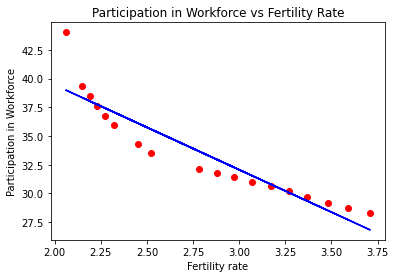

In [10]:
mlt.scatter(X_train, y_train, color = 'red')
mlt.plot(X_train, regressor.predict(X_train), color = 'blue')
mlt.title('Participation in Workforce vs Fertility Rate')
mlt.xlabel('Fertility rate')
mlt.ylabel('Participation in Workforce')
mlt.show()